# 2020 March Madness : Exploratory notebook

I produced this kernel for the [Kaggle March Madness Event](https://www.kaggle.com/c/march-madness-analytics-2020), where we had to predict the outcome of basketball games to come. I wanted to complete an Exploratory data analysis that I have found on Kaggle, by adding my own graphs and statistics.

For this kernel, I forked the excellent [Exploratory kernel](https://www.kaggle.com/robikscube/2020-march-madness-data-lets-take-a-look) of Rob Mulla for data extraction. I have replaced its stats and graphs by mine, which highlight other aspects of teams and players. Feel free to upvote or comment this kernel if you like it!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
import os
import gc

MENS_DIR = '../input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament'
WOMENS_DIR = '../input/google-cloud-ncaa-march-madness-2020-division-1-womens-tournament'

## Team Data
**MTeams & WTeams**

Team name and Team ID, first and last D1 Season. Sorting by the `FirstD1Season` column we can see some of the newest teams in D1 basketball. Welcome to D1 Merrimack! Cool mascot.

In [2]:
MTeams = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MTeams.csv')
MTeams.sort_values('FirstD1Season', ascending=False).head(5)

,TeamID,TeamName,FirstD1Season,LastD1Season
366,1467,Merrimack,2020,2020
365,1466,North Alabama,2019,2020
364,1465,Cal Baptist,2019,2020
112,1213,Grand Canyon,2014,2020
161,1262,MA Lowell,2014,2020


In [3]:
# Womens' data does not contain years joined :(
WTeams = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WTeams.csv')
WTeams.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


## MSeasons.csv & WSeasons.csv
These files identify the different seasons included in the historical data, along with certain season-level properties.


In [4]:
MSeasons = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MSeasons.csv')
WSeasons = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WSeasons.csv')
MSeasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


## Regular Season Results
**MRegularSeasonCompactResults.csv & WRegularSeasonCompactResults.csv, MNCAATourneyCompactResults.csv & WNCAATourneyCompactResults**

These files identify the game-by-game NCAA® tournament results for all seasons of historical data.

In [5]:
MRegularSeasonCompactResults = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
WRegularSeasonCompactResults = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WRegularSeasonCompactResults.csv')
MNCAATourneyCompactResults = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WNCAATourneyCompactResults.csv')
MAllResults = MRegularSeasonCompactResults.append(MNCAATourneyCompactResults)
WAllResults = WRegularSeasonCompactResults.append(WNCAATourneyCompactResults)
MAllResults.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [6]:
# Lets Add the winning and losing team names to the results
MAllResults = \
    MAllResults \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

WAllResults = \
    WAllResults \
    .merge(WTeams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(WTeams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

In [7]:
WAllResults.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1998,18,3104,91,3202,41,H,0,Alabama,Furman
1,2009,22,3349,66,3202,62,H,0,Rice,Furman
2,2008,6,3435,68,3202,51,H,0,Vanderbilt,Furman
3,2017,18,3141,81,3202,71,H,0,C Michigan,Furman
4,2008,55,3207,78,3202,58,N,0,Georgetown,Furman


Let's see how the point scored per game evolved over time:

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


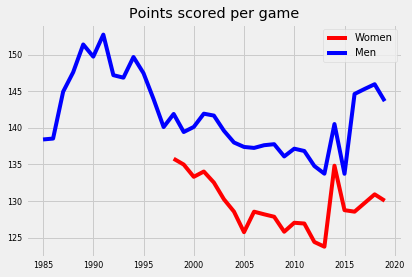

In [8]:
WAllResults['TScore'] = WAllResults['WScore'] + WAllResults['LScore']
WScores = WAllResults.groupby('Season')['TScore'].sum() / WAllResults.groupby('Season')['TScore'].count()
MAllResults['TScore'] = MAllResults['WScore'] + MAllResults['LScore']
MScores = MAllResults.groupby('Season')['TScore'].sum() / MAllResults.groupby('Season')['TScore'].count()
plt.plot(WScores, 'red', label = 'Women')
plt.plot(MScores, 'blue', label = 'Men')
plt.title('Points scored per game')
leg=plt.legend(loc='best')

Here, we see that Men and Women team grossly have the same evolution, although Mens score more points per game.

# Analysis of teams' statistics

In [9]:
def build_stats(df):
    df['DiffScore'] = df['WScore'] - df['LScore']
    df['counter'] = 1
    games_won = df.groupby('WTeamName')['counter'].count()
    games_lost = df.groupby('LTeamName')['counter'].count()
    games_won_2015 = df[df['Season'] >= 2015].groupby('WTeamName')['counter'].count()
    games_lost_2015 = df[df['Season'] >= 2015].groupby('LTeamName')['counter'].count()
    Points_scored_won = df.groupby('WTeamName')['WScore'].sum()
    Points_scored_loss = df.groupby('LTeamName')['LScore'].sum()
    Points_scored_against_won = df.groupby('WTeamName')['LScore'].sum()
    Points_scored_against_loss = df.groupby('LTeamName')['WScore'].sum()
    Diff_W = df.groupby('WTeamName')['DiffScore'].mean()
    Diff_L = - df.groupby('LTeamName')['DiffScore'].mean()
    games_played = pd.concat([games_won, games_lost, games_won_2015, games_lost_2015, Diff_W, Diff_L, Points_scored_won, Points_scored_loss, Points_scored_against_won, Points_scored_against_loss], axis = 1, sort = True)
    games_played.columns = ['Games_W', 'Games_L', 'Games_W_2015', 'Games_L_2015', 'Diff_W', 'Diff_L', 'Points_scored_W','Points_scored_L','Points_scored_against_W','Points_scored_against_L',]
    
    games_played['Games_Total'] = games_played['Games_L'] + games_played['Games_W']
    games_played['Games_Total_2015'] = games_played['Games_L_2015'] + games_played['Games_W_2015']
    games_played['Winning_Rate'] = games_played['Games_W'] * 100 / games_played['Games_Total']
    games_played['Avg_Diff'] = (games_played['Diff_W'] * games_played['Games_W'] + games_played['Diff_L'] * games_played['Games_L']) / games_played['Games_Total']
    games_played['Avg_Points_scored'] = (games_played['Points_scored_W'] + games_played['Points_scored_L']) / games_played['Games_Total']
    games_played['Avg_Points_scored_against'] = (games_played['Points_scored_against_W'] + games_played['Points_scored_against_L']) / games_played['Games_Total']
    games_played.drop(['Diff_W', 'Diff_L', 'Points_scored_W', 'Points_scored_L', 'Points_scored_against_W', 'Points_scored_against_L'], axis = 1, inplace  = True)
    
    return games_played

Mgames_played = build_stats(MAllResults)
Wgames_played = build_stats(WAllResults)

In [10]:
Mgames_played.head()

,Games_W,Games_L,Games_W_2015,Games_L_2015,Games_Total,Games_Total_2015,Winning_Rate,Avg_Diff,Avg_Points_scored,Avg_Points_scored_against
Abilene Chr,62,96,60.0,77.0,158,137.0,39.240506,-5.164557,67.398734,72.563291
Air Force,342,591,57.0,93.0,933,150.0,36.655949,-3.487674,63.660236,67.147910
Akron,571,438,98.0,64.0,1009,162.0,56.590684,2.436075,70.866204,68.430129
Alabama,684,426,92.0,73.0,1110,165.0,61.621622,4.263964,71.513514,67.249550
Alabama A&M,189,351,28.0,120.0,540,148.0,35.000000,-5.600000,65.964815,71.564815


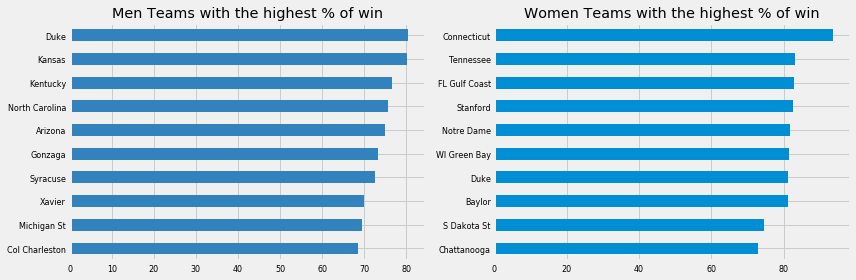

In [11]:
plt.figure(figsize = (12,4)) 
plt.subplot(121)
# REPRENDRE ICI
Mgames_played.sort_values('Winning_Rate')['Winning_Rate'].tail(10).plot(kind='barh', title = 'Men Teams with the highest % of win', cmap = plt.get_cmap('tab20c'))
plt.subplot(122)
Wgames_played.sort_values('Winning_Rate')['Winning_Rate'].tail(10).plot(kind='barh', title = 'Women Teams with the highest % of win', style = 'ggplot')
plt.tight_layout()

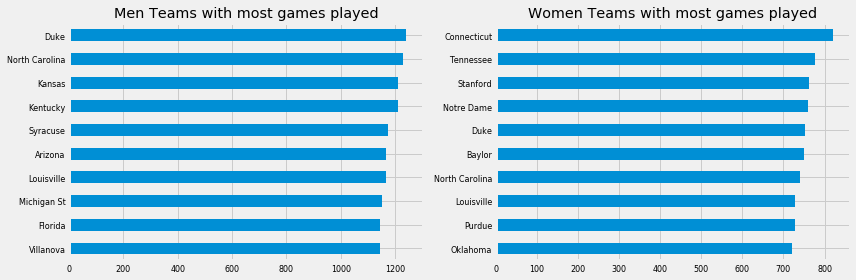

In [12]:
plt.figure(figsize = (12,4))
plt.subplot(121)
Mgames_played.sort_values('Games_Total')['Games_Total'].tail(10).plot(kind='barh', title = 'Men Teams with most games played')
plt.subplot(122)
Wgames_played.sort_values('Games_Total')['Games_Total'].tail(10).plot(kind='barh', title = 'Women Teams with most games played')
plt.tight_layout()

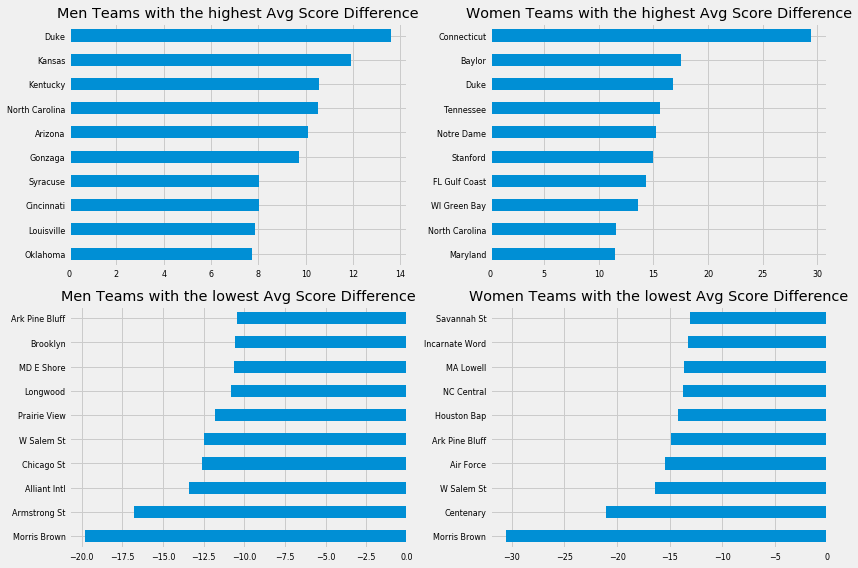

In [13]:
plt.figure(figsize = (12,8))
plt.subplot(221)
Mgames_played.sort_values('Avg_Diff')['Avg_Diff'].tail(10).plot(kind='barh', title = 'Men Teams with the highest Avg Score Difference')
plt.subplot(222)
Wgames_played.sort_values('Avg_Diff')['Avg_Diff'].tail(10).plot(kind='barh', title = 'Women Teams with the highest Avg Score Difference')
plt.subplot(223)
Mgames_played.sort_values('Avg_Diff')['Avg_Diff'].head(10).plot(kind='barh', title = 'Men Teams with the lowest Avg Score Difference')
plt.subplot(224)
Wgames_played.sort_values('Avg_Diff')['Avg_Diff'].head(10).plot(kind='barh', title = 'Women Teams with the lowest Avg Score Difference')

plt.tight_layout()

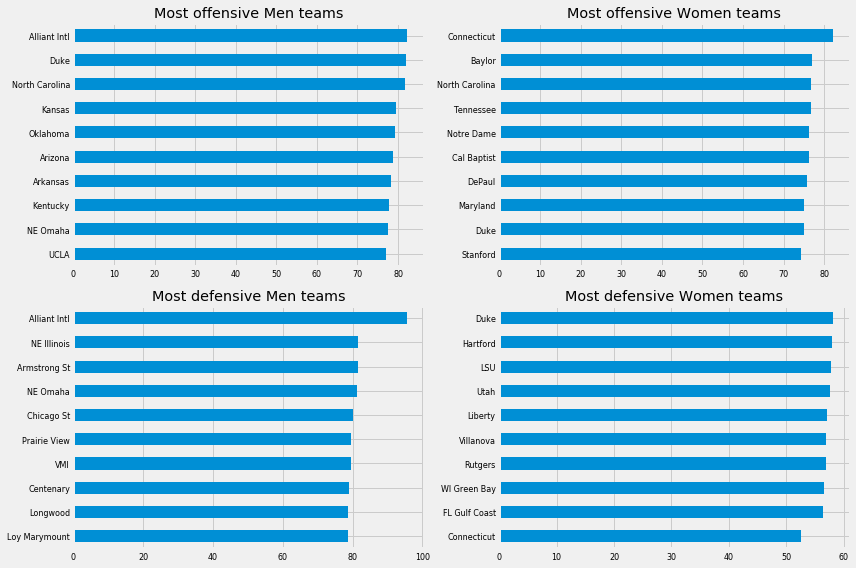

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(221)
Mgames_played.sort_values('Avg_Points_scored')['Avg_Points_scored'].tail(10).plot(kind='barh', title = 'Most offensive Men teams')
plt.subplot(222)
Wgames_played.sort_values('Avg_Points_scored')['Avg_Points_scored'].tail(10).plot(kind='barh', title = 'Most offensive Women teams')
plt.subplot(223)
Mgames_played.sort_values('Avg_Points_scored_against')['Avg_Points_scored_against'].tail(10).plot(kind='barh', title = 'Most defensive Men teams')
plt.subplot(224)
Wgames_played.sort_values('Avg_Points_scored_against')['Avg_Points_scored_against'].head(10).plot(kind='barh', title = 'Most defensive Women teams')
plt.tight_layout()

## Event Data

Each MEvents & WEvents file lists the play-by-play event logs for more than 99.5% of games from that season.
Each event is assigned to either a team or a single one of the team's players.
Thus if a basket is made by one player and an assist is credited to a second player,
that would show up as two separate records. The players are listed by PlayerID within the xPlayers.csv file.

Mens Event Files:
- MEvents2015.csv, MEvents2016.csv, MEvent2017.csv, MEvents2018.csv, MEvents2019.csv

Womens Event Files:
- WEvents2015.csv, WEvents2016.csv, WEvents2017.csv, WEvents2018.csv, WEvents2019.csv

We can read in all files and combine into one huge dataframe, one for womens and one for mens.

In [15]:
mens_events = []
for year in [2015, 2016, 2017, 2018, 2019]:
    mens_events.append(pd.read_csv(f'{MENS_DIR}/MEvents{year}.csv'))
MEvents = pd.concat(mens_events)
print(MEvents.shape)
MEvents.head()

(13149684, 17)


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0


In [16]:
womens_events = []
for year in [2015, 2016, 2017, 2018, 2019]:
    womens_events.append(pd.read_csv(f'{WOMENS_DIR}/WEvents{year}.csv'))
WEvents = pd.concat(womens_events)
print(WEvents.shape)
WEvents.head()

(12744264, 17)


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,3103,3127,80,49,0,0,11,3103,95,miss2,lay,0,0,0
1,2,2015,11,3103,3127,80,49,0,0,11,3103,84,reb,off,0,0,0
2,3,2015,11,3103,3127,80,49,0,0,14,3103,84,made2,lay,0,0,0
3,4,2015,11,3103,3127,80,49,0,0,42,3127,823,miss2,jump,0,0,0
4,5,2015,11,3103,3127,80,49,0,0,42,3103,91,reb,def,0,0,0


In [17]:
del mens_events
del womens_events
gc.collect()

MEvents = MEvents.merge(MTeams[['TeamName', 'TeamID']],
               left_on='EventTeamID',
               right_on='TeamID',
               validate='many_to_one')
WEvents = WEvents.merge(WTeams[['TeamName', 'TeamID']],
               left_on='EventTeamID',
               right_on='TeamID',
               validate='many_to_one')

# Compare team's radar charts
Here I wanted to find a common ground to compare all teams regarding different characteristics. I plan to deepen this analysis, but here is a radar chart graph that compares each team's characteristics from 0 (minimum value) to 1 (maximum).

In [18]:
def add_events(df, games_played):
    df['counter'] = 1
    for ev in df['EventType'].unique():
        games_played['{}_Count'.format(ev)] = df[df['EventType'] == ev].groupby('TeamName')['counter'].count()
        games_played['{}_Avg'.format(ev)] = games_played['{}_Count'.format(ev)] / games_played['Games_Total_2015']
    games_played.head()
    games_played['Fair Play'] = (games_played['foul_Avg'] - games_played['foul_Avg'].min()) / (games_played['foul_Avg'].max() - games_played['foul_Avg'].min())
    games_played['acc'] = (games_played['made1_Count'] + games_played['made2_Count'] + games_played['made3_Count']) / (games_played['made1_Count'] + games_played['made2_Count'] + games_played['made3_Count'] + games_played['miss1_Count'] + games_played['miss2_Count'] + games_played['miss3_Count'])
    games_played['Accuracy'] = (games_played['acc'] - games_played['acc'].min()) / (games_played['acc'].max() - games_played['acc'].min())
    games_played['Far-shooter'] = (games_played['made3_Avg'] - games_played['made3_Avg'].min()) / (games_played['made3_Avg'].max() - games_played['made3_Avg'].min())
    games_played['Block'] = (games_played['block_Avg'] - games_played['block_Avg'].min()) / (games_played['block_Avg'].max() - games_played['block_Avg'].min())
    games_played['Steal'] = (games_played['steal_Avg'] - games_played['steal_Avg'].min()) / (games_played['steal_Avg'].max() - games_played['steal_Avg'].min())
    
    return games_played

Mgames_played = add_events(MEvents, Mgames_played)
Wgames_played = add_events(WEvents, Wgames_played)

<Figure size 864x288 with 0 Axes>

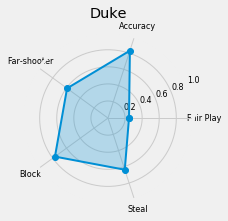

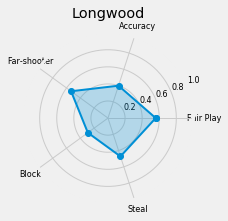

In [19]:
#Code adapted from https://typewind.github.io/2017/09/29/radar-chart/
labels = ['Fair Play', 'Accuracy', 'Far-shooter', 'Block', 'Steal']
plt.figure(figsize = (12,4))

def build_radar(team, num_subplot):
    stats = Mgames_played.loc[team][labels].values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure()
    ax = fig.add_subplot(num_subplot, polar=True)   # Set polar axis
    ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
    ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
    ax.set_title(Mgames_played.loc[team].name) 
    ax.set_rlim(0,1)
    ax.grid(True)


build_radar('Duke', 121)
build_radar('Longwood', 122)

# Team ranking
To visualize the team ranks, I had to make some choices. First, I have only worked on the **Massey Ranking**, as it seemed quite reliable. Then, I have only plotted the ranking curves of the teams that appeared **at least once in the top 3 ranking in 2019**. Finally, I made an approximation of the rank of each team in each **third of a season**. This gave me the graph that you can see at the end of this section! 

The ranking file is only available for men teams.

In [23]:
MMassey = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MMasseyOrdinals.csv')
MMassey = MMassey.merge(MTeams[['TeamName', 'TeamID']],
               left_on='TeamID',
               right_on='TeamID',
               validate='many_to_one')


best_teams = MMassey[(MMassey['SystemName'] == 'MAS') 
                      & (MMassey['OrdinalRank'] <= 3) 
                      & (MMassey['Season'] == 2019)]['TeamName'].unique()

In [24]:
rank_df = pd.DataFrame(columns = ['TeamName', 'OrdinalRank', 'Season', 'Temp'])
for season in MMassey['Season'].unique():
    k = 0
    counter = 0
    for i in np.linspace(0, 133, 3, dtype = int):
        rank_series = pd.DataFrame(MMassey[(MMassey['SystemName'] == 'MAS')
                      & (MMassey['Season'] == season)
                      & (MMassey['RankingDayNum'] <= i) 
                      & (MMassey['RankingDayNum'] >= k)
                      & (MMassey['TeamName'].isin(best_teams))].groupby('TeamName', as_index=False)['OrdinalRank'].mean())
        rank_series['Season'] = season
        rank_series['Temp'] = counter
        k = i
        counter += 1
        rank_df = rank_df.append(rank_series)
rank_df.head()

,TeamName,OrdinalRank,Season,Temp
0,Duke,5.0,2003,1
1,Gonzaga,48.4,2003,1
2,Kansas,44.0,2003,1
3,Michigan,196.8,2003,1
4,Michigan St,44.6,2003,1


In [25]:
ranking_table = pd.pivot_table(rank_df,
               values = 'OrdinalRank',
               index = 'TeamName',
               columns = ['Season', 'Temp'],
               aggfunc= (lambda x: x))
ranking_table.head()

Season        2003          2004              2005          2010        2011  \
Temp             1     2       1     2           1     2       1     2     0   
TeamName                                                                       
Duke           5.0   9.2   9.625   1.9    9.000000   6.5    3.75   3.8   2.0   
Gonzaga       48.4  41.8  22.750   4.9    5.666667  10.9   35.25  21.5  38.0   
Kansas        44.0  12.2  12.125  22.7    5.000000   3.6    4.00   1.8   1.0   
Michigan     196.8  63.4  36.375  67.1  133.000000  91.3  150.75  90.1  68.0   
Michigan St   44.6  49.6  57.500  54.7   26.666667  18.2   29.50  15.0  15.0   

Season                  ...    2015          2016          2017          2018  \
Temp                 1  ...       1     2       1     2       1     2       1   
TeamName                ...                                                     
Duke          1.777778  ...   5.125   4.3   5.500  17.0   9.375  16.0   5.375   
Gonzaga      48.444444  ...  10.500   3.6  20.000  38.8   7.625   1.1   9.625   
Kansas        2.888889  ...  10.500   7.0  10.000   3.8   3.625   3.3   9.125   
Michigan     50.666667  ...  45.625  77.4  45.250  33.1  39.625  43.5  28.125   
Michigan St  23.000000  ...  25.625  31.6   4.125   7.1  36.375  47.6  13.750   

Season                 2019        
Temp            2         1     2  
TeamName                           
Duke          7.1  2.111111   2.3  
Gonzaga      10.8  5.444444   4.5  
Kansas       11.9  3.777778  12.8  
Michigan     15.5  1.666667   5.9  
Michigan St   6.6  8.555556   6.0  

[5 rows x 27 columns]

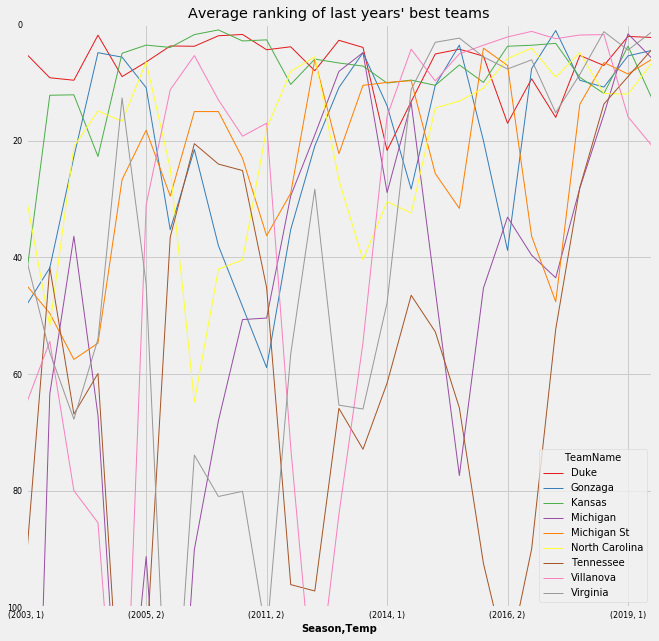

In [29]:
ranking_table.T.plot(legend = True, 
                     colormap = 'Set1',
                     figsize = (10,10), 
                     title = 'Average ranking of last years\' best teams',
                     linewidth = 1)
plt.gca().invert_yaxis()
plt.ylim(bottom=100, top = 0)
plt.show()

This shows how quick the ranking changes ! Let's note that Duke and Kansas have been in the top ranks for more than 15 years.